Plan eye-tracking:
- подивитися частоту saccades duration ЄЄЄ
- подивитися частоту saccades velocity ЄЄЄ 
- порахувати середні значення ЄЄЄ
- порівняти довжини зміни погляду ЄЄЄ
- на графіку в координатах просто вибрати місця найбільшого скупчення погляду ЄЄЄ
- спробувати зробити мл кластеризація місць скупчень погляду НА ПОТІМ

Plan hand-movement:
- обрати лише кілька колонок даних
- подивитися також рухи рук, частоту

Побудувати модель баєсівську на ключових значеннях людей з виходом пілот чи не пілот.

## Importing

In [2]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np

## Help functions

In [26]:
def remove_outliers(df, column):
    df_copy = df.copy()  # Make a copy of the DataFrame to keep other columns unchanged
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
    return df_copy

In [90]:
def plot_boxplot(df, columns_to_plot, num_cols, color):
    num_plots = len(columns_to_plot)
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 6*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(columns_to_plot):
        sb.boxplot(data=df[column], ax=axs[i], color=color)
        axs[i].set_title(f'Boxplot of {column}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel(column)

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

# Non Pilot Data

## Eye-tracking analysis

### Gaze

In [14]:
gaze_non_pilot = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking-hand-movement/data/eye-tracking/sofiia_piloting/gaze.csv')

In [16]:
gaze_non_pilot.head()

,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,azimuth [deg],elevation [deg]
0,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1716479123922351133,729.784,1041.068,1.0,NaN,NaN,-5.481927,-27.871359
1,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1716479123927351133,686.099,1007.823,1.0,NaN,NaN,-8.453112,-25.673950
2,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1716479123932351133,742.671,1032.708,1.0,NaN,NaN,-4.560109,-27.347290
3,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1716479123937351133,690.385,1012.463,1.0,NaN,NaN,-8.168607,-25.978665
4,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1716479123942476133,743.375,1033.172,1.0,NaN,NaN,-4.511439,-27.377792


In [261]:
gaze_non_pilot.shape

(68202, 10)

In [17]:
gaze_non_pilot.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'gaze x [px]',
       'gaze y [px]', 'worn', 'fixation id', 'blink id', 'azimuth [deg]',
       'elevation [deg]'],
      dtype='object')

In [18]:
column_names_gaze = {'section id' : 'section_id',
                     'recording id' : 'recording_id',
                     'timestamp [ns]' : 'timestamp',
                     'gaze x [px]' : 'gaze_x',
                     'gaze y [px]' : 'gaze_y',
                     'fixation id' : 'fixation_id',
                     'blink id' : 'blink_id',
                     'azimuth [deg]' : 'azimuth',
                     'elevation [deg]' : 'elevation'}

gaze_non_pilot = gaze_non_pilot.rename(columns=column_names_gaze)

In [19]:
gaze_non_pilot['timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in gaze_non_pilot['timestamp']]

In [20]:
gaze_non_pilot.head()

,section_id,recording_id,timestamp,gaze_x,gaze_y,worn,fixation_id,blink_id,azimuth,elevation
0,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2024-05-23 11:45:23,729.784,1041.068,1.0,NaN,NaN,-5.481927,-27.871359
1,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2024-05-23 11:45:23,686.099,1007.823,1.0,NaN,NaN,-8.453112,-25.673950
2,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2024-05-23 11:45:23,742.671,1032.708,1.0,NaN,NaN,-4.560109,-27.347290
3,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2024-05-23 11:45:23,690.385,1012.463,1.0,NaN,NaN,-8.168607,-25.978665
4,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2024-05-23 11:45:23,743.375,1033.172,1.0,NaN,NaN,-4.511439,-27.377792


In [21]:
gaze_selected = ['timestamp', 'gaze_x', 'gaze_y']

In [22]:
gaze_non_pilot_to_corr = gaze_non_pilot[gaze_selected]

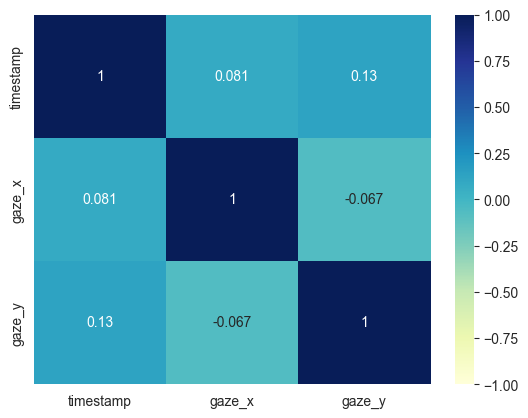

In [23]:
dataplot_gaze_non_pilot = sb.heatmap(gaze_non_pilot_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

In [33]:
gaze_non_pilot_data = gaze_non_pilot[gaze_selected]

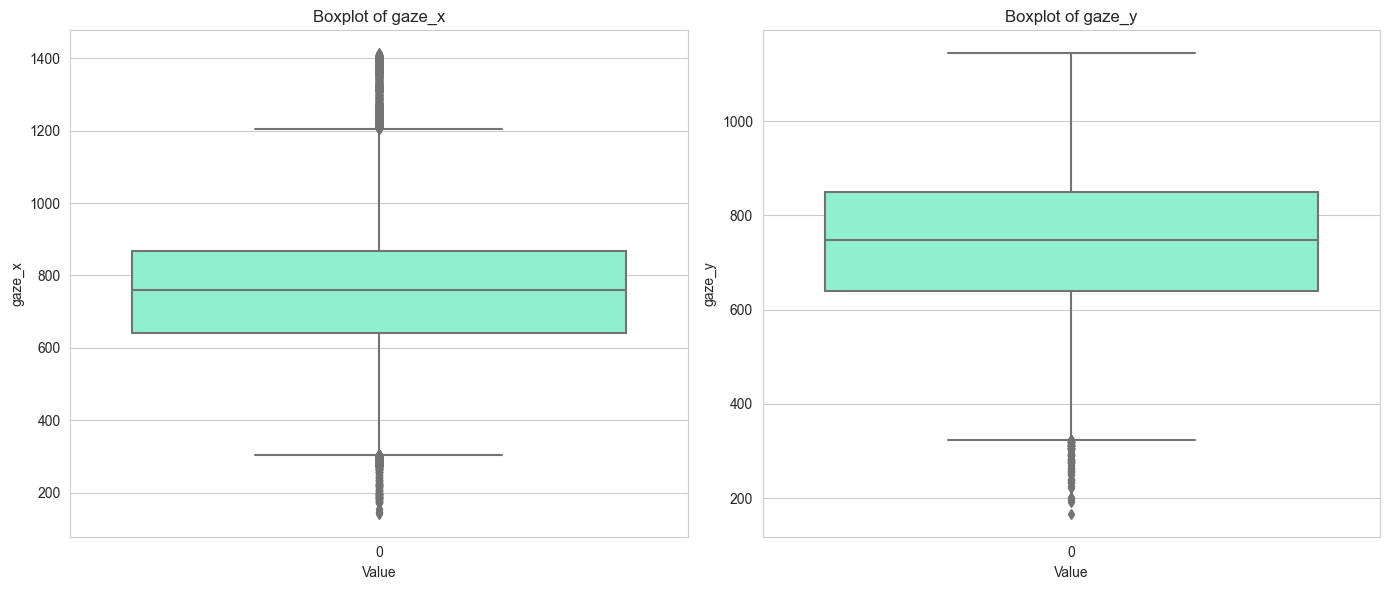

In [120]:
plot_boxplot(gaze_non_pilot_data.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) - 1, 'aquamarine')

In [110]:
gaze_non_pilot_filtered = gaze_non_pilot_data.copy()

In [111]:
for column in gaze_selected:
    gaze_non_pilot_filtered = remove_outliers(gaze_non_pilot_filtered, column)

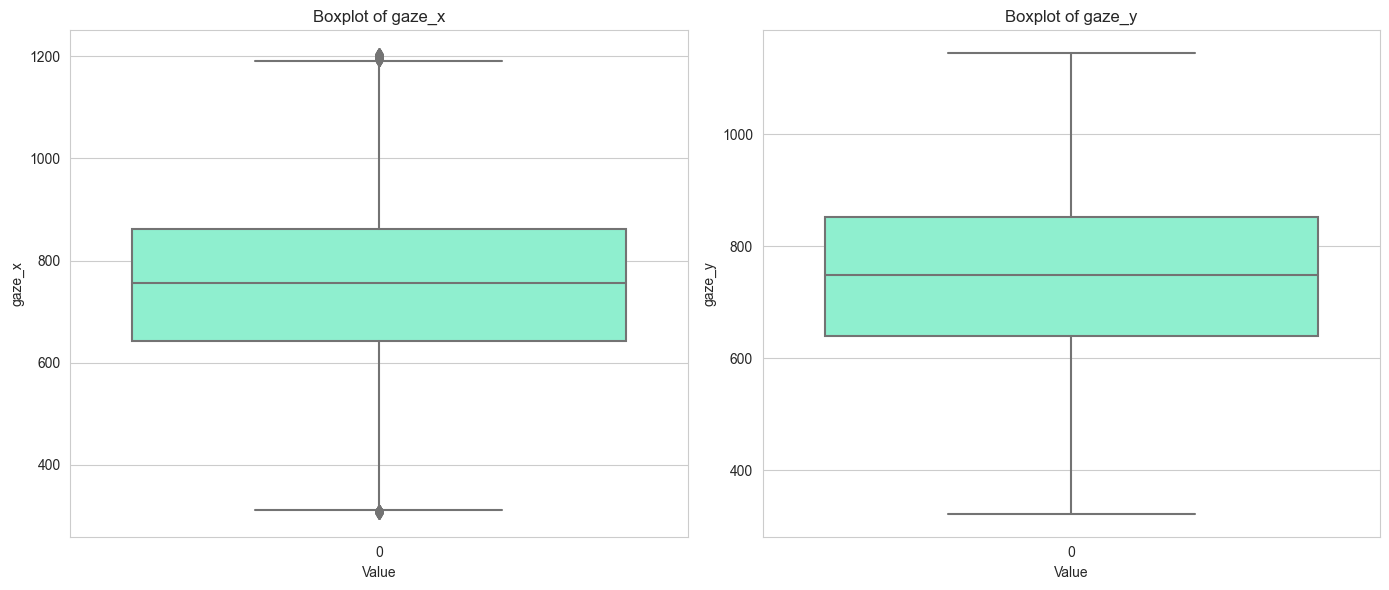

In [119]:
plot_boxplot(gaze_non_pilot_filtered.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) - 1, 'aquamarine')

### Gaze analysis

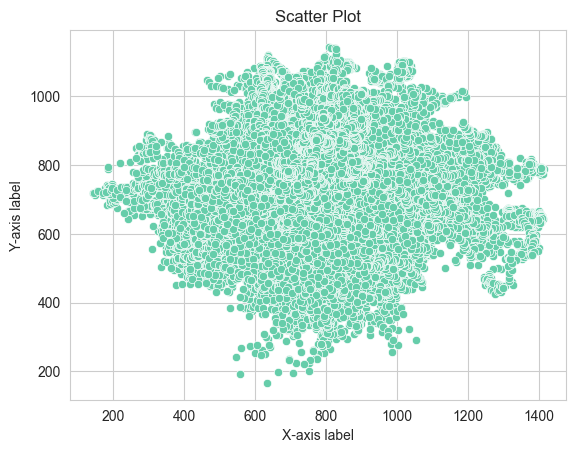

In [118]:
scatter_plot = sb.scatterplot(data=gaze_non_pilot_data, x='gaze_x', y='gaze_y', color='mediumaquamarine')
scatter_plot.set(xlabel="X-axis label", ylabel="Y-axis label", title="Scatter Plot")

plt.show()

<Figure size 1000x600 with 0 Axes>

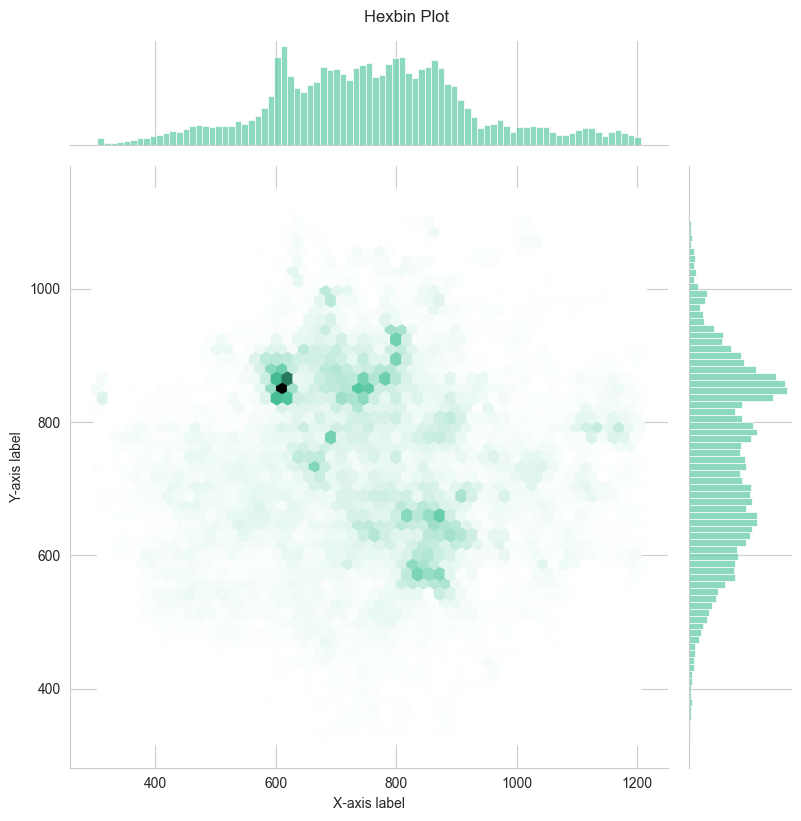

In [121]:
plt.figure(figsize=(10, 6))
hex_plot = sb.jointplot(data=gaze_non_pilot_filtered, x='gaze_x', y='gaze_y', kind='hex', height=8, color='mediumaquamarine')
hex_plot.set_axis_labels("X-axis label", "Y-axis label")
hex_plot.fig.suptitle("Hexbin Plot", y=1.02)  # Adjust the title position
plt.show()

In [123]:
gaze_non_pilot_filtered['distance'] = np.sqrt((gaze_non_pilot_filtered['gaze_x'] - gaze_non_pilot_filtered['gaze_x'].shift(1))**2 + (gaze_non_pilot_filtered['gaze_y'] - gaze_non_pilot_filtered['gaze_y'].shift(1))**2)

In [124]:
gaze_non_pilot_filtered = gaze_non_pilot_filtered.dropna()

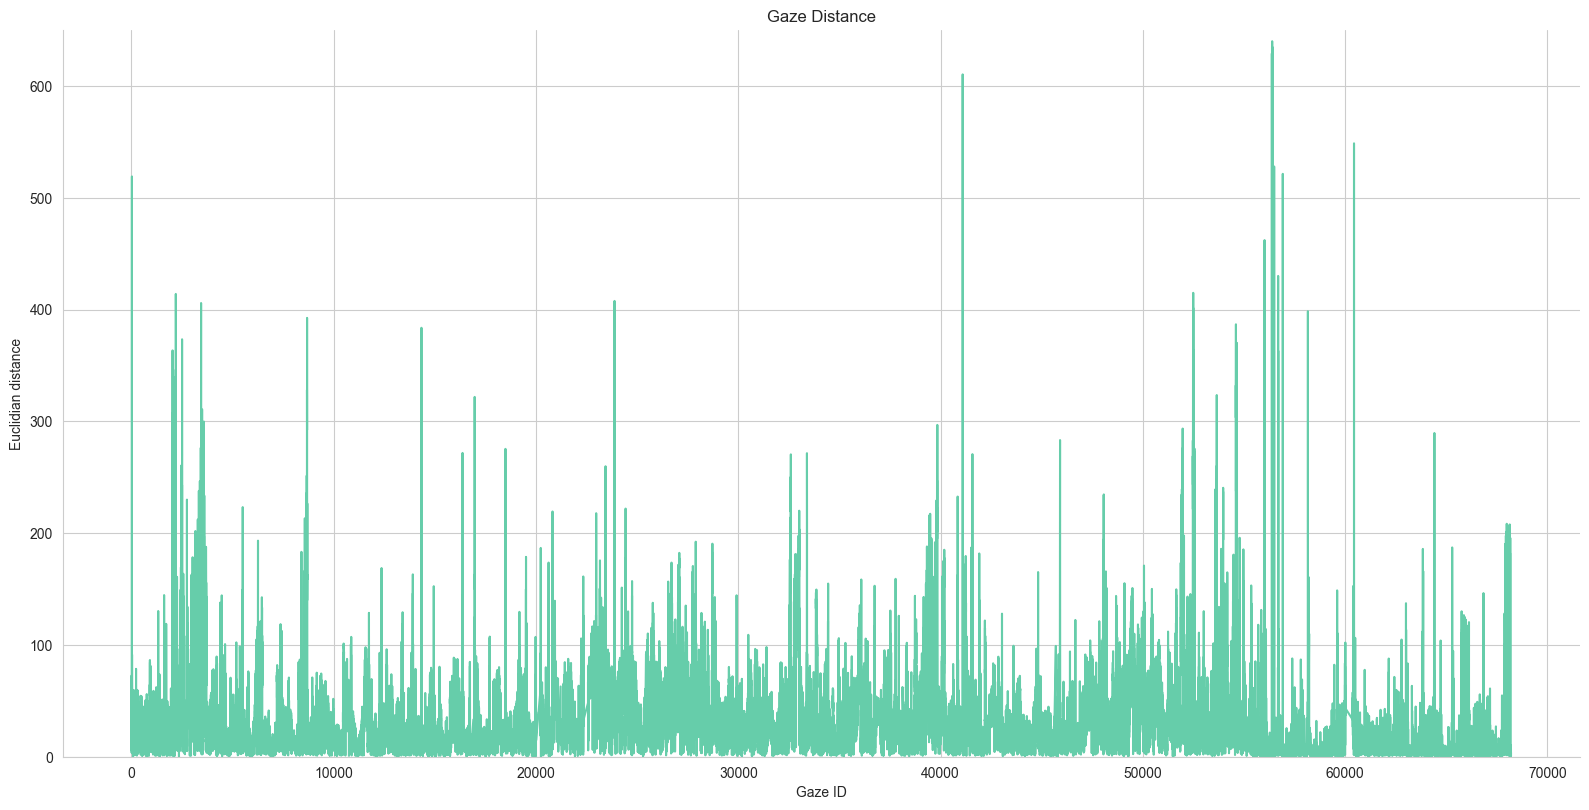

In [125]:
plot = sb.relplot(data=gaze_non_pilot_filtered, x=gaze_non_pilot_filtered.index, y="distance", kind="line", height=8, aspect=2, color='mediumaquamarine')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

In [126]:
window_size = 35  # Adjust window size as needed
gaze_non_pilot_filtered['distance_smoothed'] = gaze_non_pilot_filtered['distance'].rolling(window=window_size).mean()

/var/folders/2_/_b4ql37j43j9kygf4pkqr9z00000gn/T/ipykernel_96278/1075996215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaze_non_pilot_filtered['distance_smoothed'] = gaze_non_pilot_filtered['distance'].rolling(window=window_size).mean()


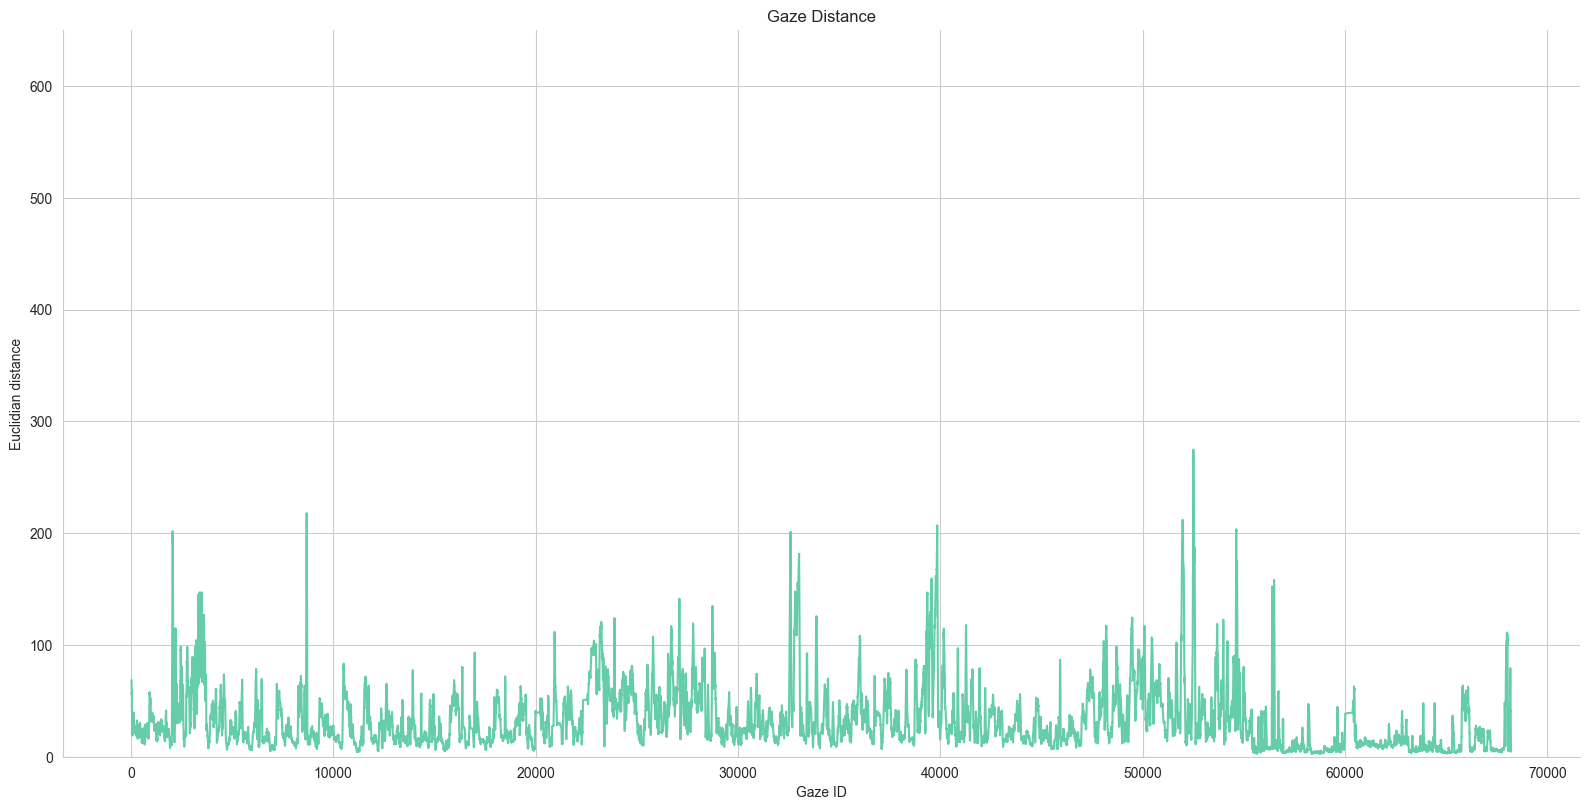

In [127]:
plot = sb.relplot(data=gaze_non_pilot_filtered, x=gaze_non_pilot_filtered.index, y="distance_smoothed", kind="line", height=8, aspect=2, color='mediumaquamarine')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

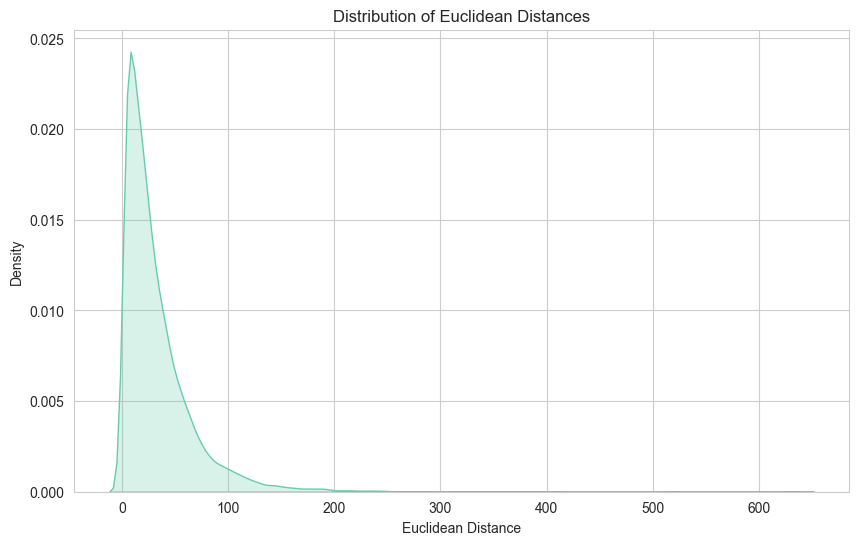

In [233]:
plt.figure(figsize=(10, 6))
sb.kdeplot(gaze_non_pilot_filtered['distance'], fill=True, color='mediumaquamarine')
plt.xlabel("Euclidean Distance")
plt.ylabel("Density")
plt.title("Distribution of Euclidean Distances")
plt.show()

### Saccades

In [50]:
saccades_non_pilot = pd.read_csv(
    '/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking-hand-movement/data/eye-tracking/sofiia_piloting/saccades.csv')

In [51]:
saccades_non_pilot.columns

Index(['section id', 'recording id', 'saccade id', 'start timestamp [ns]',
       'end timestamp [ns]', 'duration [ms]', 'amplitude [px]',
       'amplitude [deg]', 'mean velocity [px/s]', 'peak velocity [px/s]'],
      dtype='object')

In [52]:
saccades_non_pilot.head()

,section id,recording id,saccade id,start timestamp [ns],end timestamp [ns],duration [ms],amplitude [px],amplitude [deg],mean velocity [px/s],peak velocity [px/s]
0,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1,1716479123972476133,1716479124122601133,150,56.181703,3.582817,3343.292202,10438.884136
1,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2,1716479124247726133,1716479124282726133,35,24.636285,1.560755,1015.232844,1365.360838
2,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,3,1716479124447851133,1716479124522976133,75,21.125843,1.341992,912.064894,1140.957758
3,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,4,1716479124633101133,1716479124648101133,15,5.814321,0.370758,991.302205,1100.348723
4,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,5,1716479125103475133,1716479125178600133,75,57.797500,3.655549,1029.469100,1873.457989


In [53]:
column_names_saccades = {'section id': 'section_id',
                         'recording id': 'recording_id',
                         'saccade id': 'saccade_id',
                         'start timestamp [ns]': 'start_timestamp',
                         'end timestamp [ns]': 'end_timestamp',
                         'duration [ms]': 'duration',
                         'amplitude [px]': 'amplitude_px',
                         'amplitude [deg]': 'amplitude_deg',
                         'mean velocity [px/s]': 'mean_velocity',
                         'peak velocity [px/s]': 'peak_velocity'}

saccades_non_pilot = saccades_non_pilot.rename(columns=column_names_saccades)

In [54]:
saccades_non_pilot.head()

,section_id,recording_id,saccade_id,start_timestamp,end_timestamp,duration,amplitude_px,amplitude_deg,mean_velocity,peak_velocity
0,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1,1716479123972476133,1716479124122601133,150,56.181703,3.582817,3343.292202,10438.884136
1,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2,1716479124247726133,1716479124282726133,35,24.636285,1.560755,1015.232844,1365.360838
2,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,3,1716479124447851133,1716479124522976133,75,21.125843,1.341992,912.064894,1140.957758
3,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,4,1716479124633101133,1716479124648101133,15,5.814321,0.370758,991.302205,1100.348723
4,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,5,1716479125103475133,1716479125178600133,75,57.797500,3.655549,1029.469100,1873.457989


In [55]:
saccades_non_pilot['start_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in saccades_non_pilot['start_timestamp']]

In [56]:
saccades_non_pilot['end_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in saccades_non_pilot['end_timestamp']]

In [57]:
saccades_non_pilot.head()

,section_id,recording_id,saccade_id,start_timestamp,end_timestamp,duration,amplitude_px,amplitude_deg,mean_velocity,peak_velocity
0,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1,2024-05-23 11:45:23,2024-05-23 11:45:24,150,56.181703,3.582817,3343.292202,10438.884136
1,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2,2024-05-23 11:45:24,2024-05-23 11:45:24,35,24.636285,1.560755,1015.232844,1365.360838
2,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,3,2024-05-23 11:45:24,2024-05-23 11:45:24,75,21.125843,1.341992,912.064894,1140.957758
3,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,4,2024-05-23 11:45:24,2024-05-23 11:45:24,15,5.814321,0.370758,991.302205,1100.348723
4,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,5,2024-05-23 11:45:25,2024-05-23 11:45:25,75,57.797500,3.655549,1029.469100,1873.457989


In [58]:
saccades_selected = ['start_timestamp', 'duration', 'amplitude_deg', 'mean_velocity']

In [59]:
saccades_non_pilot_to_corr = saccades_non_pilot[saccades_selected]

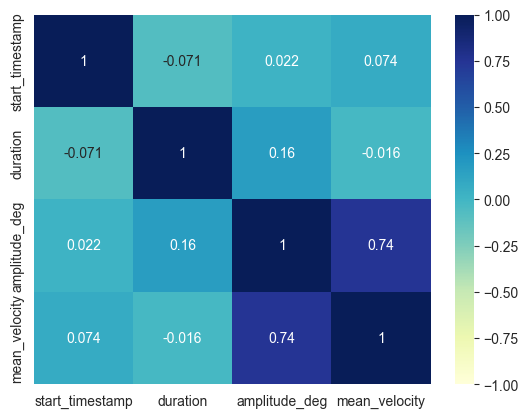

In [60]:
dataplot_saccades = sb.heatmap(saccades_non_pilot_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

In [61]:
saccades_non_pilot_data = saccades_non_pilot[saccades_selected]

In [62]:
saccades_non_pilot_data.head(100)

,start_timestamp,duration,amplitude_deg,mean_velocity
0,2024-05-23 11:45:23,150,3.582817,3343.292202
1,2024-05-23 11:45:24,35,1.560755,1015.232844
2,2024-05-23 11:45:24,75,1.341992,912.064894
3,2024-05-23 11:45:24,15,0.370758,991.302205
4,2024-05-23 11:45:25,75,3.655549,1029.469100
...,...,...,...,...
95,2024-05-23 11:46:08,15,1.047224,1070.448499
96,2024-05-23 11:46:09,90,1.068387,2587.007395
97,2024-05-23 11:46:09,84,23.623585,4317.498632
98,2024-05-23 11:46:09,55,10.531167,3041.843813


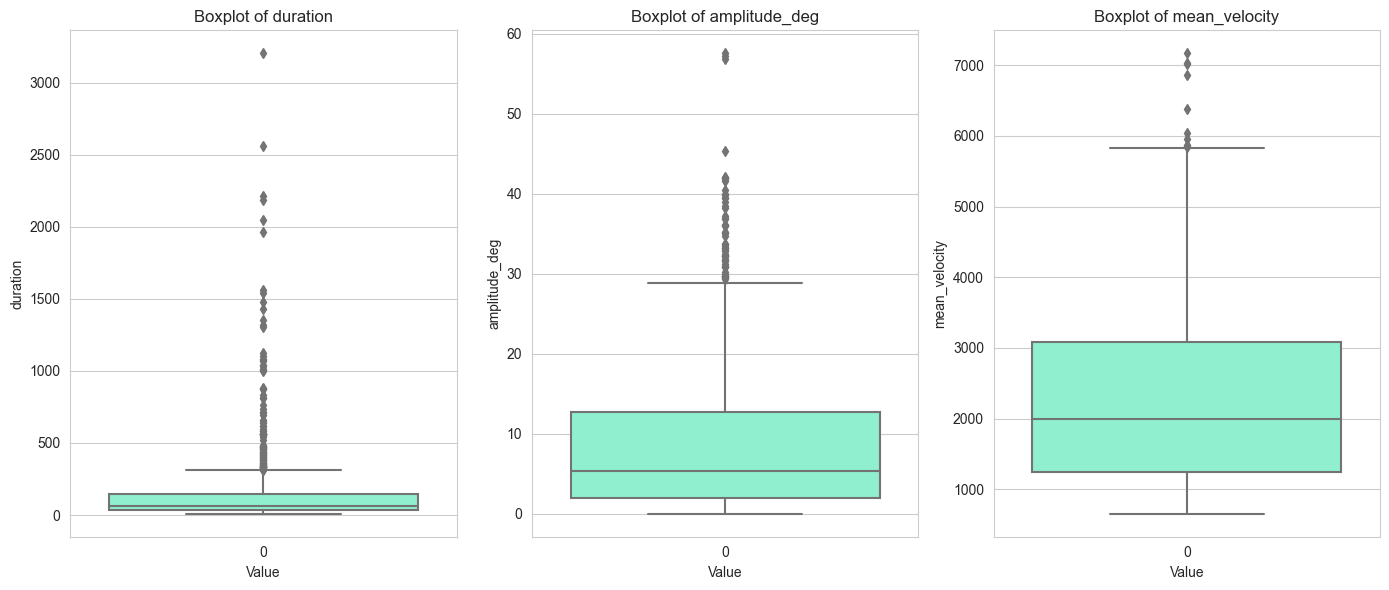

In [129]:
plot_boxplot(saccades_non_pilot_data.iloc[:, 1:], saccades_selected[1:], len(saccades_selected) - 1, color='aquamarine')

In [65]:
saccades_non_pilot_filtered = saccades_non_pilot_data.copy()

In [66]:
for column in saccades_selected:
    saccades_non_pilot_filtered = remove_outliers(saccades_non_pilot_filtered, column)

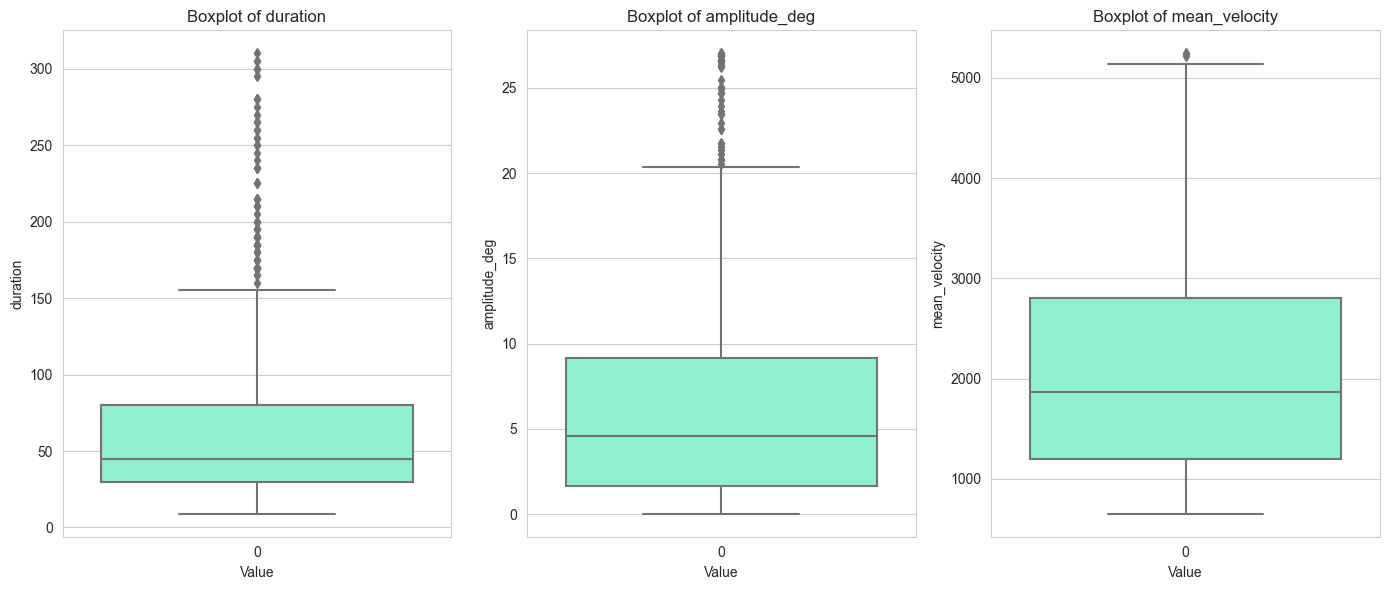

In [130]:
plot_boxplot(saccades_non_pilot_filtered.iloc[:, 1:], saccades_selected[1:], len(saccades_selected) - 1, color='aquamarine')

### Saccades analysis

In [68]:
saccades_non_pilot_filtered.describe()

,start_timestamp,duration,amplitude_deg,mean_velocity
count,617,617.000000,617.000000,617.000000
mean,2024-05-23 11:48:30.419773184,67.732577,6.652174,2122.120598
min,2024-05-23 11:45:23,9.000000,0.017749,653.743276
25%,2024-05-23 11:47:07,30.000000,1.666947,1194.358028
50%,2024-05-23 11:48:34,45.000000,4.578311,1870.490738
75%,2024-05-23 11:50:02,80.000000,9.175331,2799.491052
max,2024-05-23 11:51:07,310.000000,27.013139,5241.866593
std,NaN,60.845996,6.502682,1086.361865


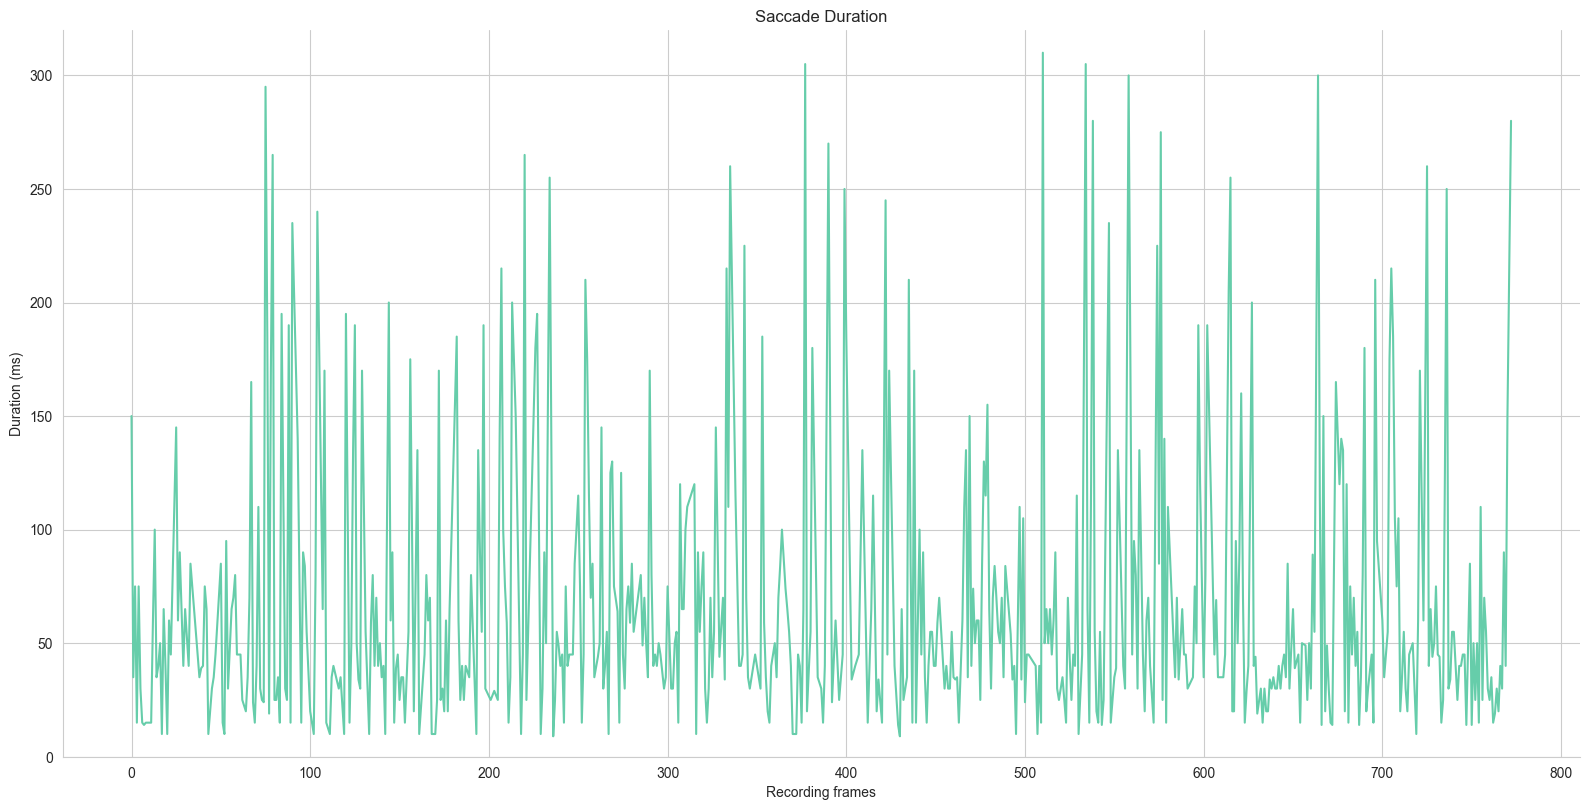

In [255]:
g = sb.relplot(data=saccades_non_pilot_filtered, x=saccades_non_pilot_filtered.index, y="duration", kind="line", height=8, aspect=2, color='mediumaquamarine')
g.set(xlabel="Recording frames", ylabel="Duration (ms)", title="Saccade Duration")
g.ax.set_ylim(0, 320)
plt.show()

In [70]:
window_size = 10  # Adjust window size as needed
saccades_non_pilot_filtered['duration_smoothed'] = saccades_non_pilot_filtered['duration'].rolling(window=window_size).mean()

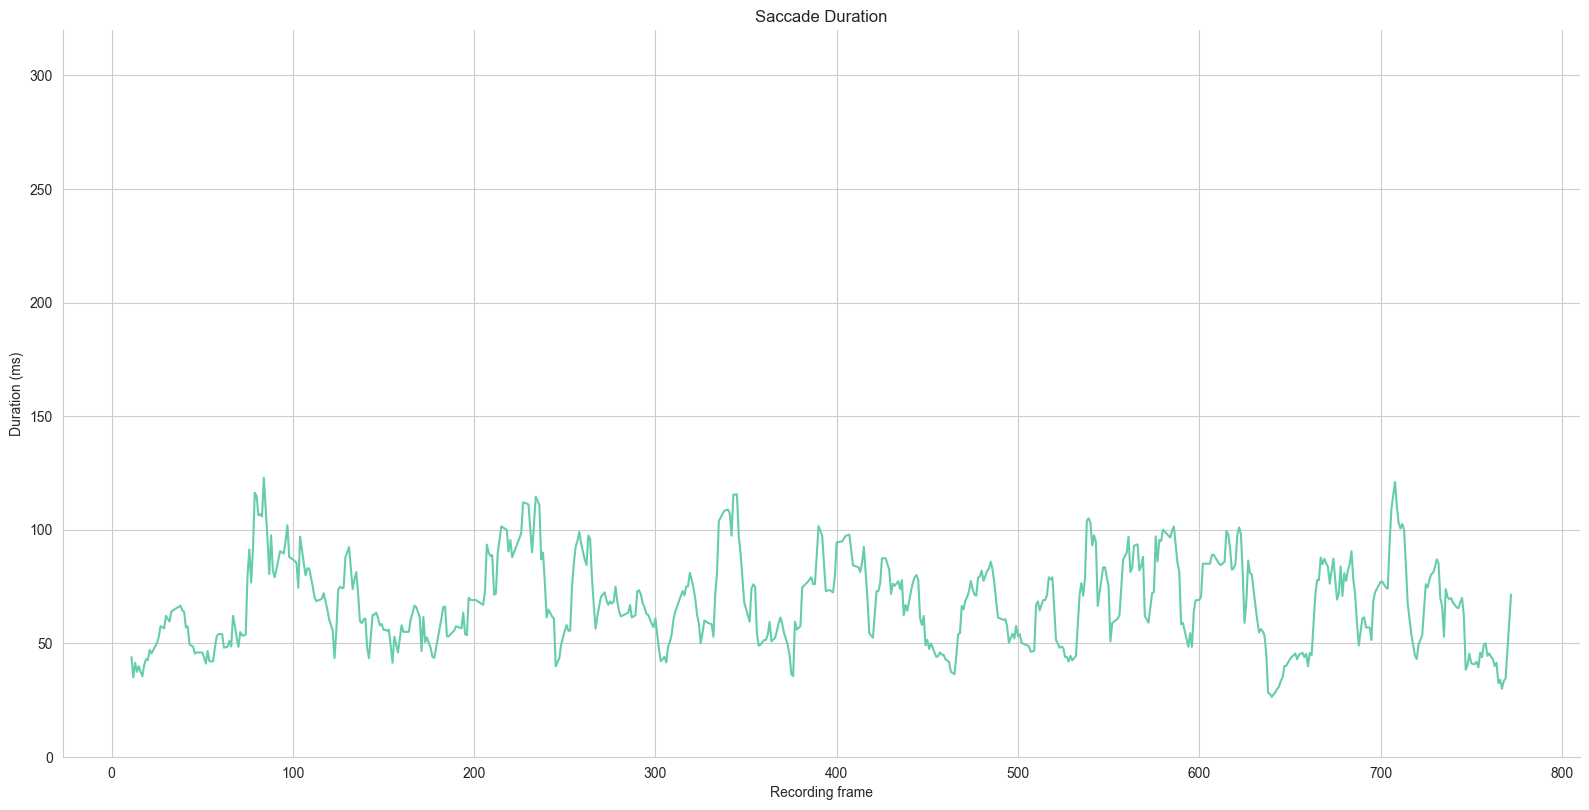

In [256]:
g = sb.relplot(data=saccades_non_pilot_filtered, x=saccades_non_pilot_filtered.index, y="duration_smoothed", kind="line", height=8, aspect=2, color='mediumaquamarine')
g.set(xlabel="Recording frame", ylabel="Duration (ms)", title="Saccade Duration")
g.ax.set_ylim(0, 320)
plt.show()

### Fixations

In [217]:
fixations_non_pilot = pd.read_csv(
    '/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking-hand-movement/data/eye-tracking/sofiia_piloting/fixations.csv')

In [218]:
fixations_non_pilot.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px],fixation y [px],azimuth [deg],elevation [deg]
0,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1,1716479124122601133,1716479124247726133,125,680.147,962.668,-8.739473,-22.766109
1,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2,1716479124282726133,1716479124447851133,165,693.138,959.517,-7.843286,-22.582656
2,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,3,1716479124522976133,1716479124633101133,110,681.388,952.014,-8.627948,-22.083784
3,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,4,1716479124648101133,1716479125103475133,455,675.707,951.455,-9.013979,-22.039280
4,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,5,1716479125178600133,1716479126159474133,980,709.981,995.429,-6.765663,-24.913040


In [219]:
fixations_non_pilot.columns

Index(['section id', 'recording id', 'fixation id', 'start timestamp [ns]',
       'end timestamp [ns]', 'duration [ms]', 'fixation x [px]',
       'fixation y [px]', 'azimuth [deg]', 'elevation [deg]'],
      dtype='object')

In [312]:
fixations_non_pilot.shape

(773, 11)

In [220]:
column_names_fixations = {'section id' : 'section_id',
                          'recording id' : 'recording_id',
                          'fixation id' : 'fixation_id',
                          'start timestamp [ns]' : 'start_timestamp',
                          'end timestamp [ns]' : 'end_timestamp',
                          'duration [ms]' : 'duration',
                          'fixation x [px]' : 'fixation_x',
                          'fixation y [px]' : 'fixation_y',
                          'azimuth [deg]' : 'azimuth',
                          'elevation [deg]': 'elevation'}

fixations_non_pilot = fixations_non_pilot.rename(columns=column_names_fixations)

In [222]:
fixations_non_pilot.head()

,section_id,recording_id,fixation_id,start_timestamp,end_timestamp,duration,fixation_x,fixation_y,azimuth,elevation
0,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,1,1716479124122601133,1716479124247726133,125,680.147,962.668,-8.739473,-22.766109
1,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,2,1716479124282726133,1716479124447851133,165,693.138,959.517,-7.843286,-22.582656
2,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,3,1716479124522976133,1716479124633101133,110,681.388,952.014,-8.627948,-22.083784
3,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,4,1716479124648101133,1716479125103475133,455,675.707,951.455,-9.013979,-22.039280
4,ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8,17ba065b-fe2d-409d-9cc9-6b750ba4a306,5,1716479125178600133,1716479126159474133,980,709.981,995.429,-6.765663,-24.913040


In [215]:
fixations_non_pilot['start_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_non_pilot['start_timestamp']]

In [216]:
fixations_non_pilot['end_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_non_pilot['end_timestamp']]

In [223]:
to_corr = ['duration', 'fixation_x', 'fixation_y']
fixations_non_pilot_to_corr = fixations_non_pilot[to_corr]

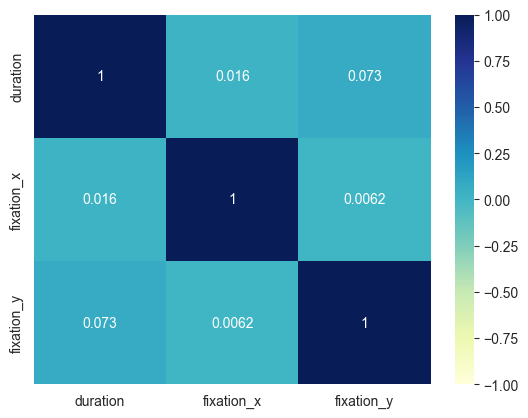

In [224]:
dataplot_fixations = sb.heatmap(fixations_non_pilot_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

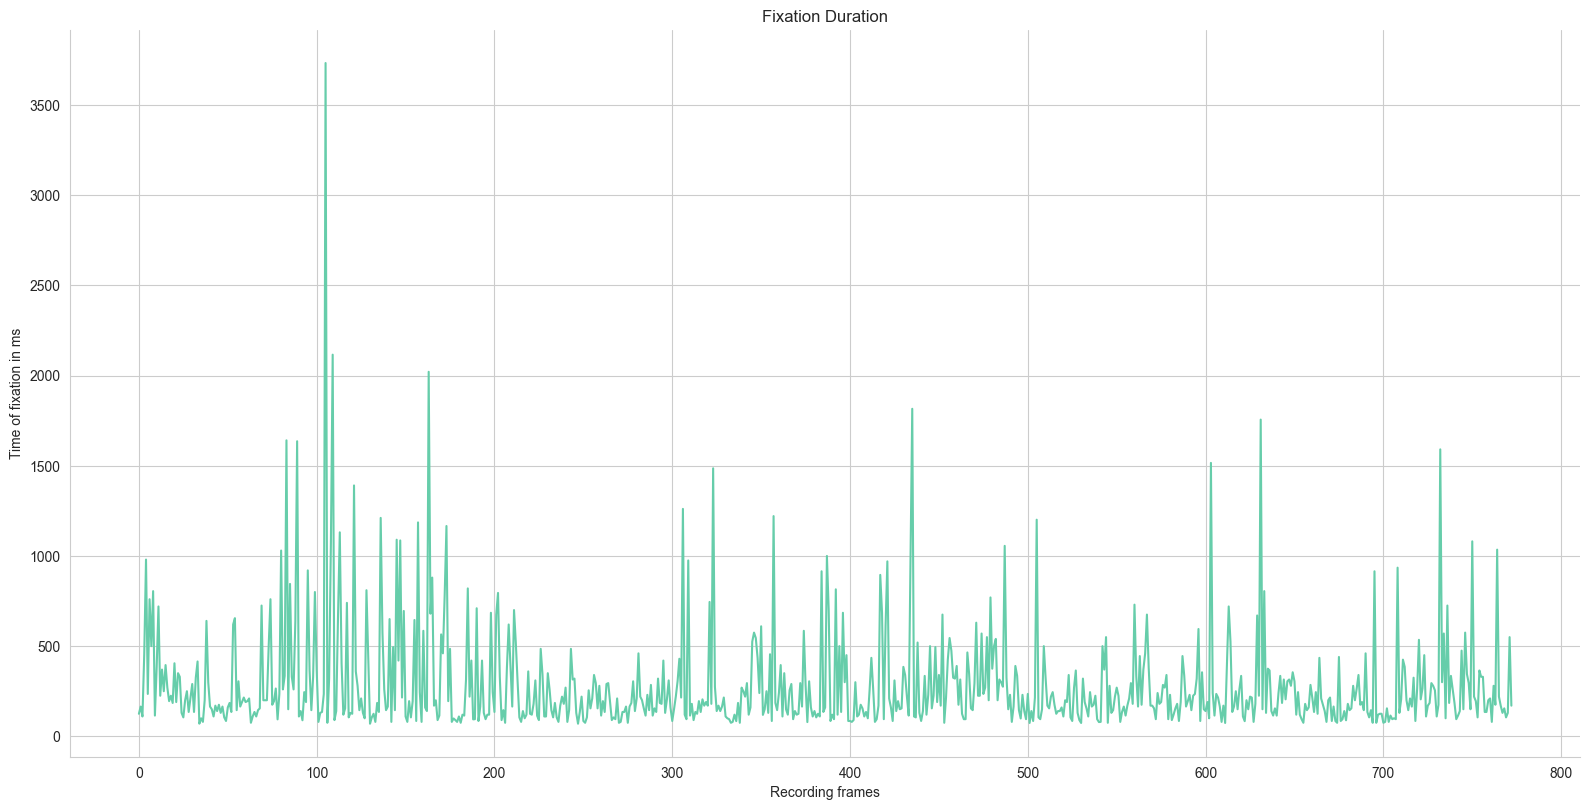

In [260]:
g2 = sb.relplot(data=fixations_non_pilot, x=fixations_non_pilot.index, y="duration", kind="line", height=8, aspect=2, color='mediumaquamarine')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Fixation Duration")
plt.show()

In [228]:
window_size = 10  # Adjust window size as needed
fixations_non_pilot['duration_smoothed'] = fixations_non_pilot['duration'].rolling(window=window_size).mean()

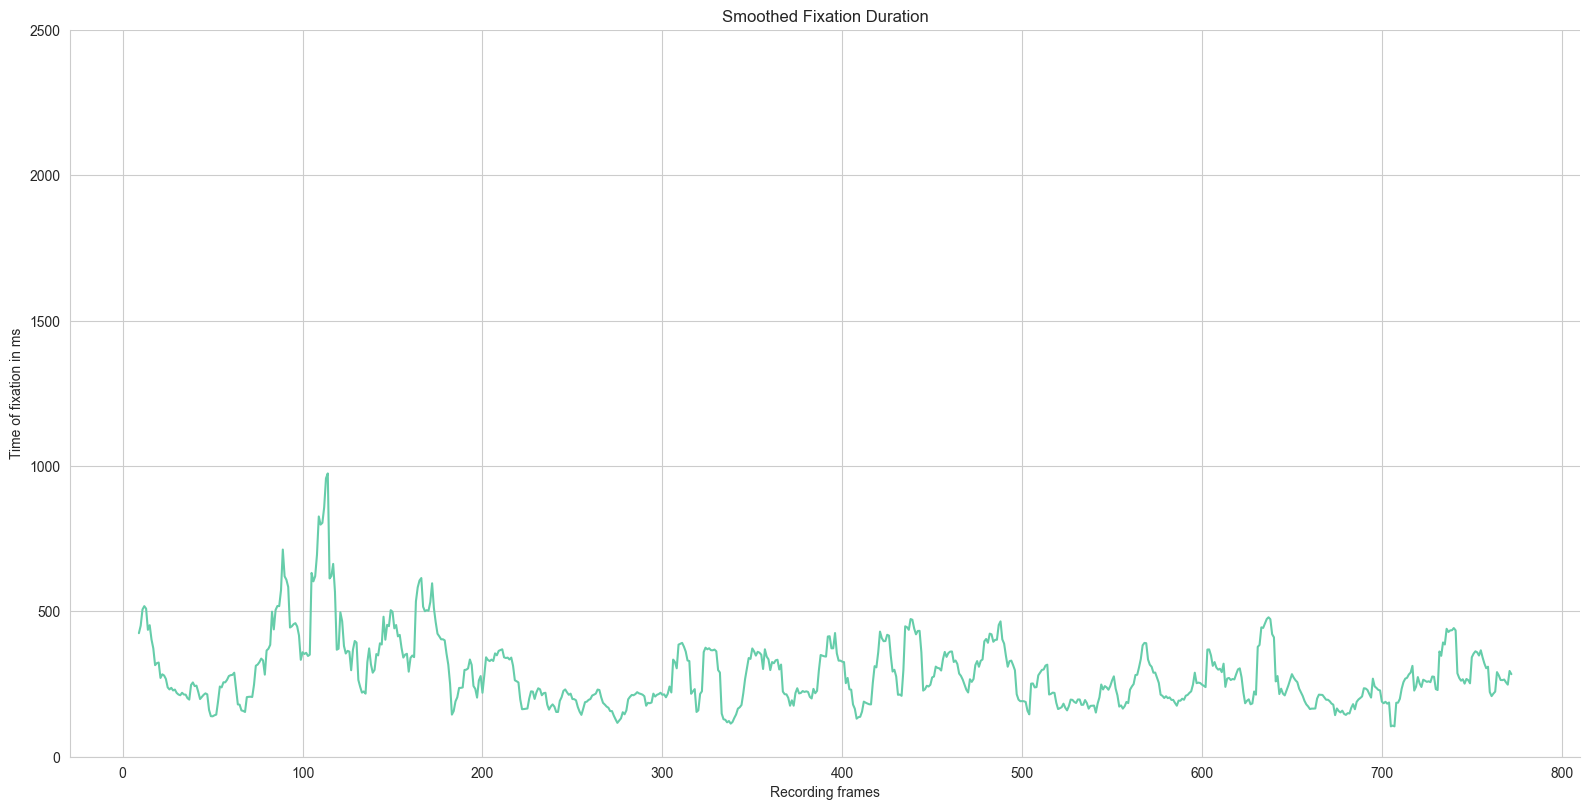

In [368]:
g2 = sb.relplot(data=fixations_non_pilot, x=fixations_non_pilot.index, y="duration_smoothed", kind="line", height=8, aspect=2, color='mediumaquamarine')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Smoothed Fixation Duration")
g2.ax.set_ylim(0, 2500)
plt.show()

## Hand movement analysis

In [398]:
hand_non_pilot = pd.read_csv('/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking-hand-movement/data/hand-movement/sofiia_piloting.tsv', sep='\t')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 8, saw 3


# Pilot Data

## Eye-tracking analysis

### Gaze

In [270]:
gaze_pilot = pd.read_csv(
    '/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking-hand-movement/data/eye-tracking/narein_piloting/gaze.csv')

In [271]:
gaze_pilot.head()

,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,azimuth [deg],elevation [deg]
0,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,1718830663944518591,1004.618,672.953,1.0,NaN,NaN,12.856262,-4.021674
1,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,1718830663949526591,1006.607,677.726,1.0,NaN,NaN,12.988878,-4.329349
2,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,1718830663954517591,1005.920,680.765,1.0,1.0,NaN,12.946196,-4.526068
3,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,1718830663959517591,1010.261,679.473,1.0,1.0,NaN,13.227987,-4.440557
4,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,1718830663964519591,1024.965,668.028,1.0,1.0,NaN,14.177149,-3.695135


In [272]:
gaze_pilot.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'gaze x [px]',
       'gaze y [px]', 'worn', 'fixation id', 'blink id', 'azimuth [deg]',
       'elevation [deg]'],
      dtype='object')

In [273]:
column_names_gaze = {'section id': 'section_id',
                     'recording id': 'recording_id',
                     'timestamp [ns]': 'timestamp',
                     'gaze x [px]': 'gaze_x',
                     'gaze y [px]': 'gaze_y',
                     'fixation id': 'fixation_id',
                     'blink id': 'blink_id',
                     'azimuth [deg]': 'azimuth',
                     'elevation [deg]': 'elevation'}

gaze_pilot = gaze_pilot.rename(columns=column_names_gaze)

In [274]:
gaze_pilot['timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in gaze_pilot['timestamp']]
gaze_pilot.head()

,section_id,recording_id,timestamp,gaze_x,gaze_y,worn,fixation_id,blink_id,azimuth,elevation
0,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,2024-06-19 16:57:43,1004.618,672.953,1.0,NaN,NaN,12.856262,-4.021674
1,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,2024-06-19 16:57:43,1006.607,677.726,1.0,NaN,NaN,12.988878,-4.329349
2,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,2024-06-19 16:57:43,1005.920,680.765,1.0,1.0,NaN,12.946196,-4.526068
3,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,2024-06-19 16:57:43,1010.261,679.473,1.0,1.0,NaN,13.227987,-4.440557
4,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,2024-06-19 16:57:43,1024.965,668.028,1.0,1.0,NaN,14.177149,-3.695135


Additionally, we remove first 2:33 minutes of recording because of the recording content.

In [275]:
gaze_pilot = gaze_pilot[gaze_pilot['timestamp'] >= datetime.strptime('2024-06-19 17:00:16', "%Y-%m-%d %H:%M:%S")].reset_index(drop=True)

In [276]:
gaze_pilot.shape

(221489, 10)

In [277]:
gaze_pilot = gaze_pilot[:68202]

In [294]:
gaze_pilot.shape

(68202, 10)

In [278]:
gaze_selected = ['timestamp', 'gaze_x', 'gaze_y']

In [279]:
gaze_pilot_to_corr = gaze_pilot[gaze_selected]

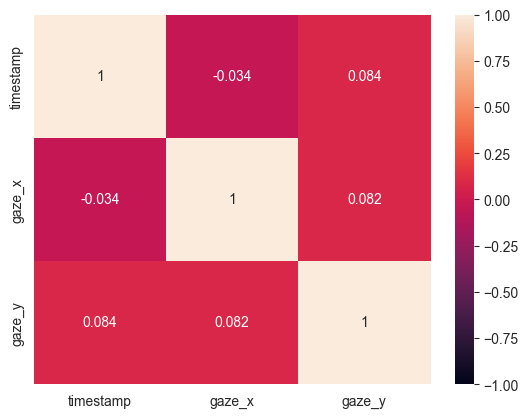

In [280]:
dataplot_gaze = sb.heatmap(gaze_pilot_to_corr.corr(), annot=True, vmin=-1, vmax=1)

In [296]:
gaze_pilot_data = gaze_pilot[gaze_selected]

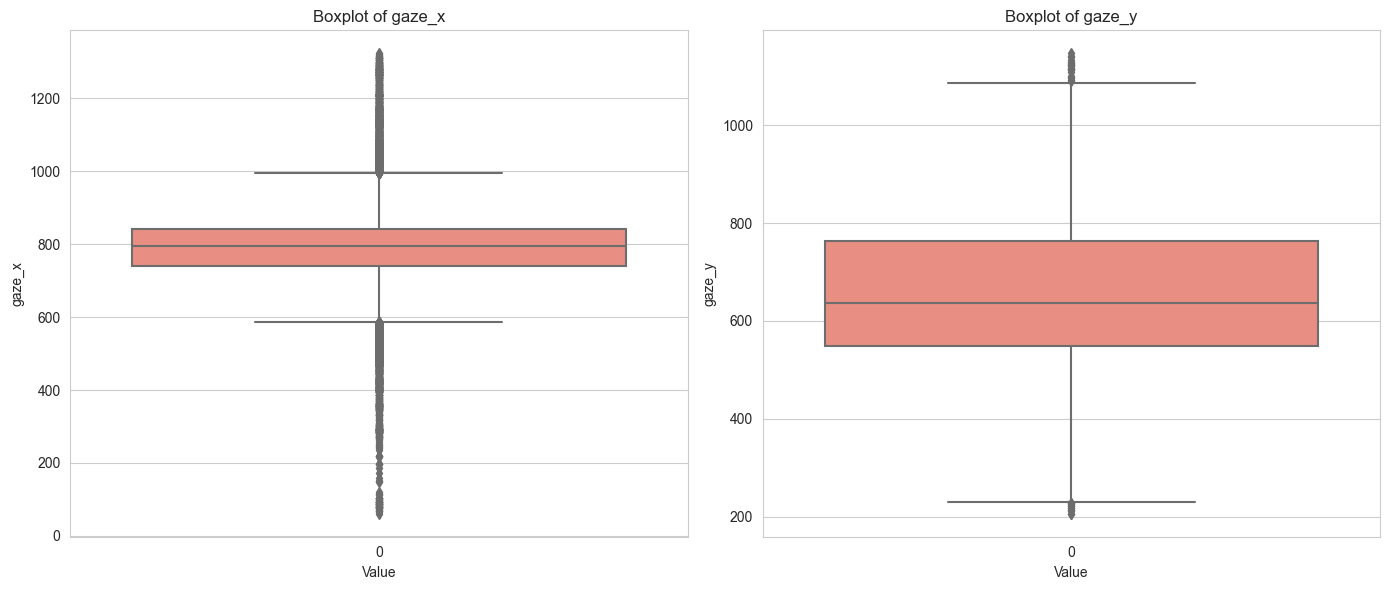

In [297]:
plot_boxplot(gaze_pilot_data.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) - 1, 'salmon')

In [298]:
gaze_pilot_filtered = gaze_pilot_data.copy()

In [299]:
for column in gaze_selected:
    gaze_pilot_filtered = remove_outliers(gaze_pilot_filtered, column)

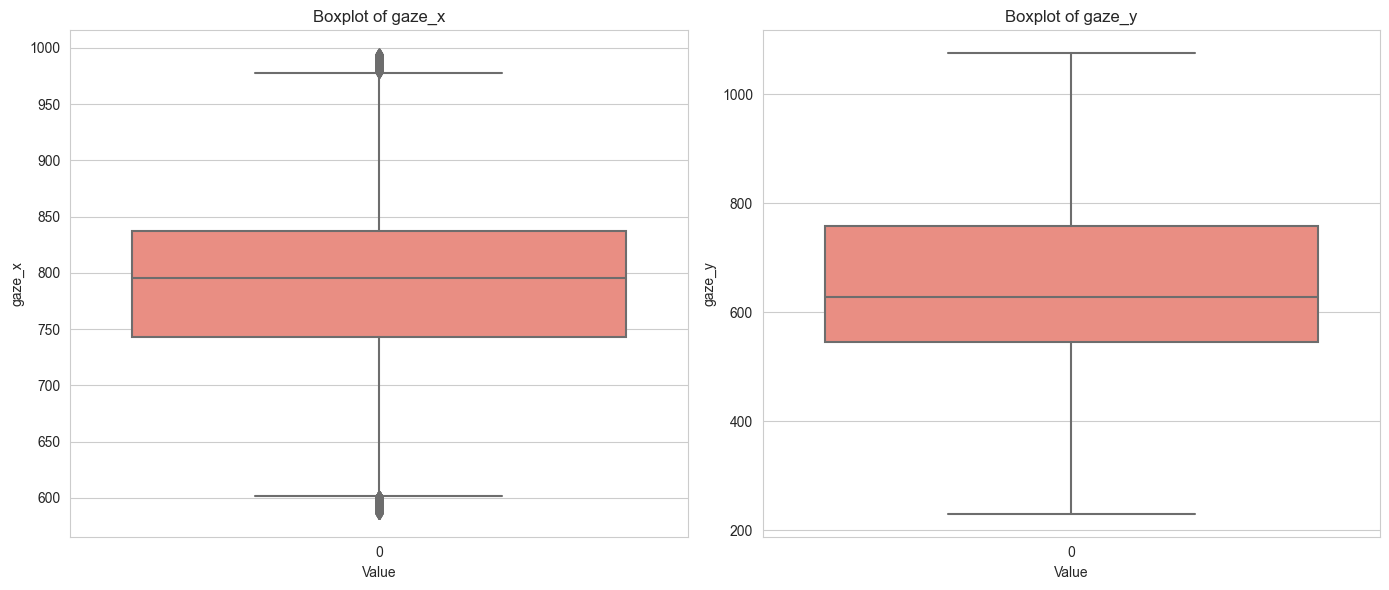

In [300]:
plot_boxplot(gaze_pilot_filtered.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) - 1, 'salmon')

### Gaze analysis

In [301]:
gaze_pilot_filtered.shape

(64175, 3)

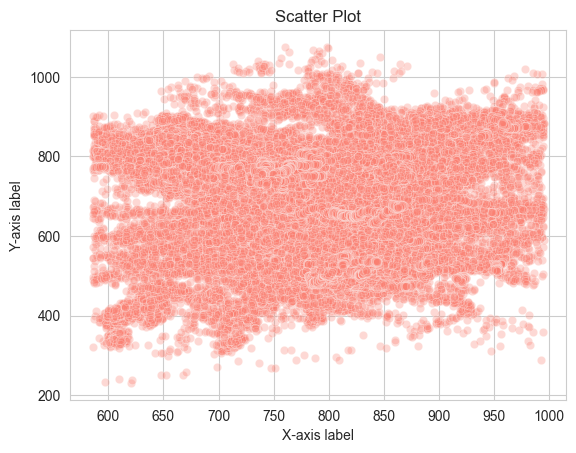

In [302]:
scatter_plot = sb.scatterplot(data=gaze_pilot_filtered, x='gaze_x', y='gaze_y', color='salmon', alpha=0.3)
scatter_plot.set(xlabel="X-axis label", ylabel="Y-axis label", title="Scatter Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

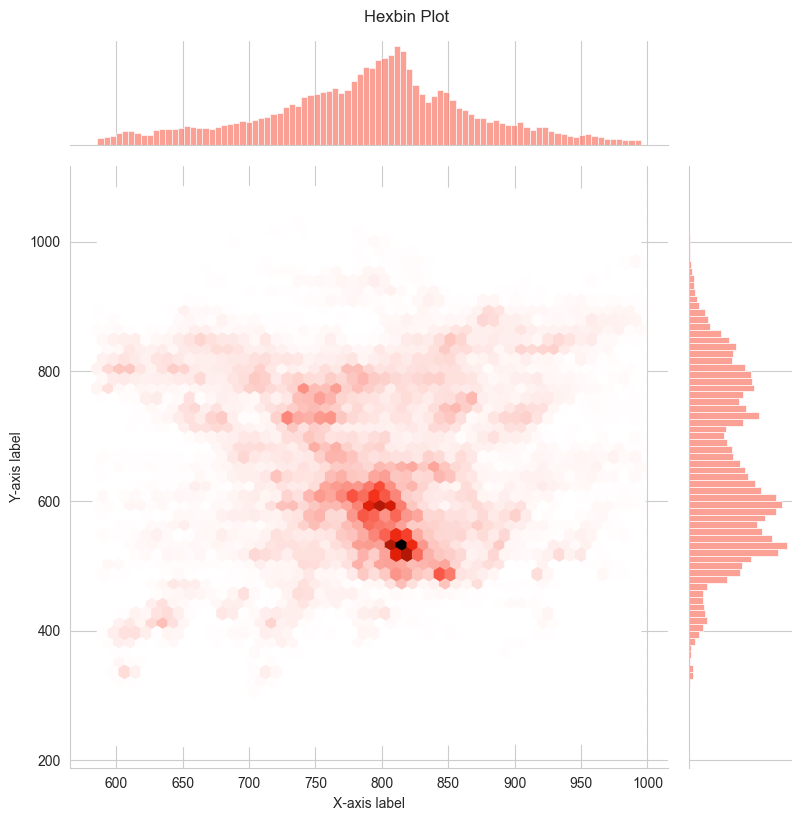

In [303]:
plt.figure(figsize=(10, 6))
hex_plot = sb.jointplot(data=gaze_pilot_filtered, x='gaze_x', y='gaze_y', kind='hex', height=8, color='salmon')
hex_plot.set_axis_labels("X-axis label", "Y-axis label")
hex_plot.fig.suptitle("Hexbin Plot", y=1.02)  # Adjust the title position
plt.show()

In [304]:
gaze_pilot_filtered['distance'] = np.sqrt((gaze_pilot_filtered['gaze_x'] - gaze_pilot_filtered['gaze_x'].shift(1)) ** 2 + (
        gaze_pilot_filtered['gaze_y'] - gaze_pilot_filtered['gaze_y'].shift(1)) ** 2)

In [305]:
gaze_filtered = gaze_pilot_filtered.dropna()

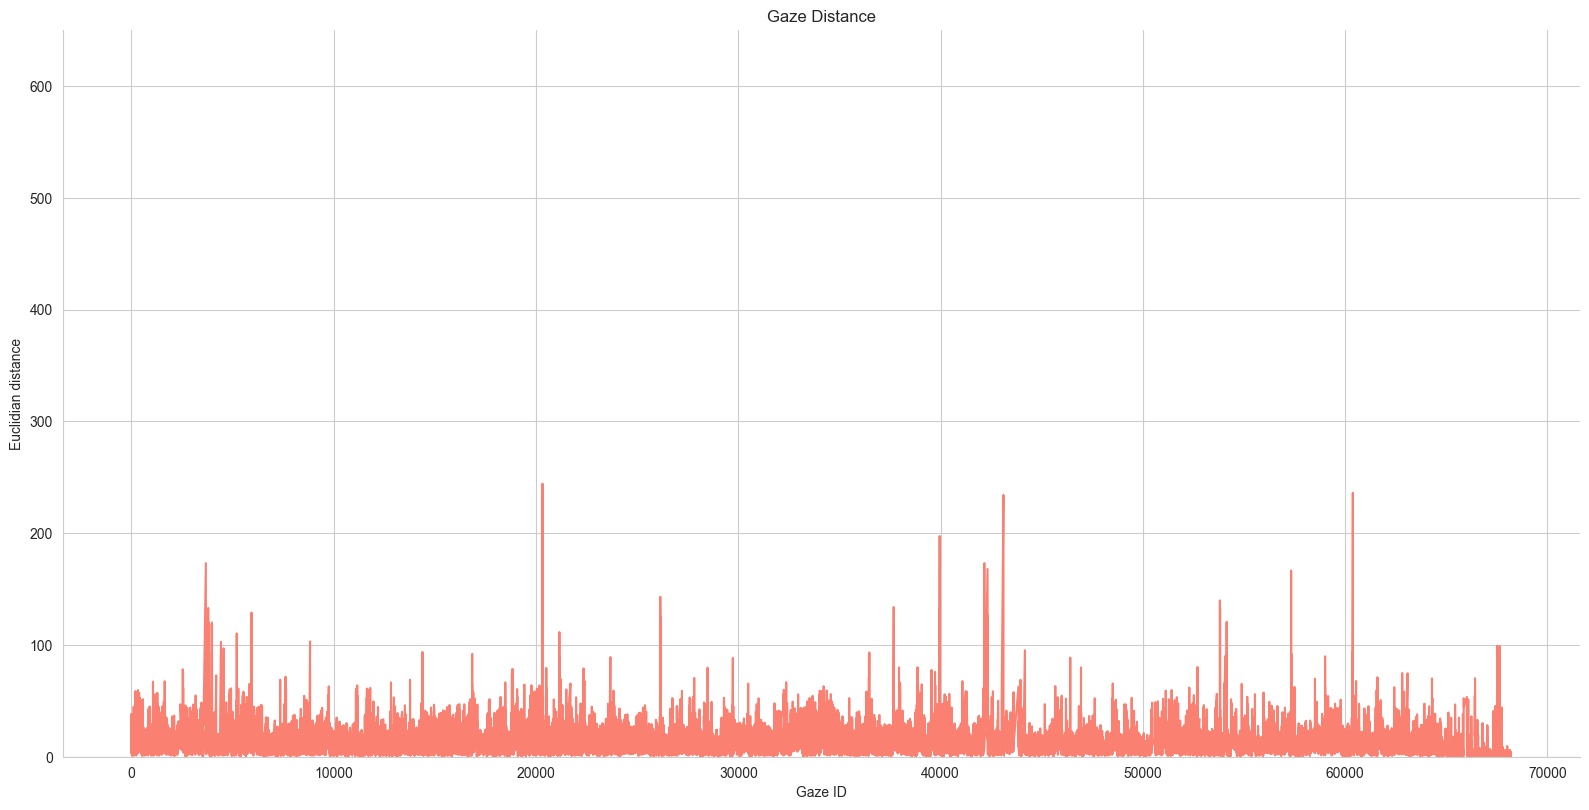

In [306]:
plot = sb.relplot(data=gaze_pilot_filtered, x=gaze_pilot_filtered.index, y="distance", kind="line", height=8, aspect=2, color='salmon')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

In [307]:
window_size = 35  # Adjust window size as needed
gaze_pilot_filtered['distance_smoothed'] = gaze_pilot_filtered['distance'].rolling(window=window_size).mean()

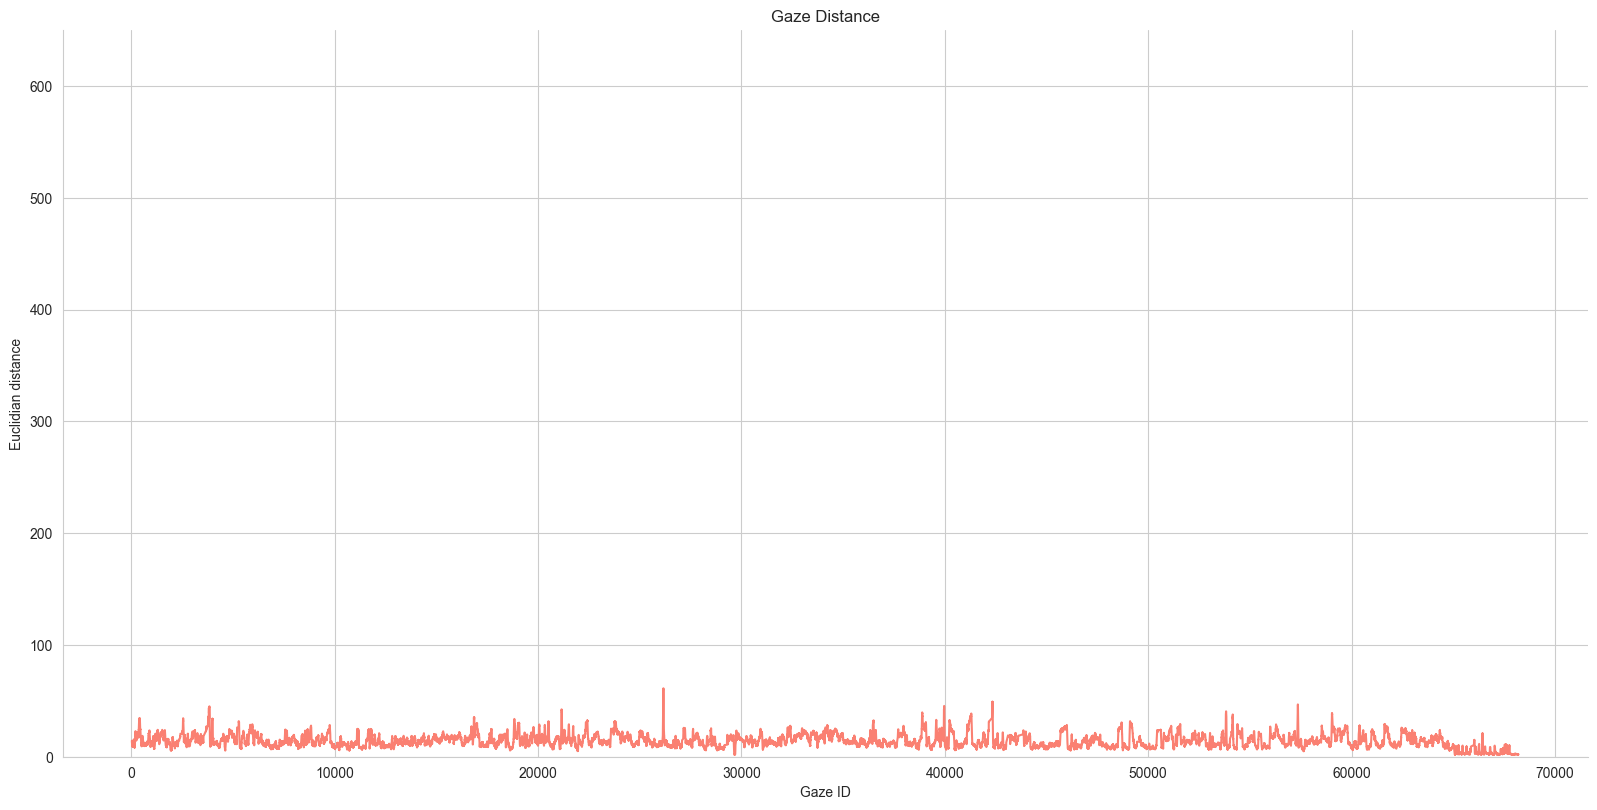

In [308]:
plot = sb.relplot(data=gaze_pilot_filtered, x=gaze_pilot_filtered.index, y="distance_smoothed", kind="line", height=8, aspect=2, color='salmon')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

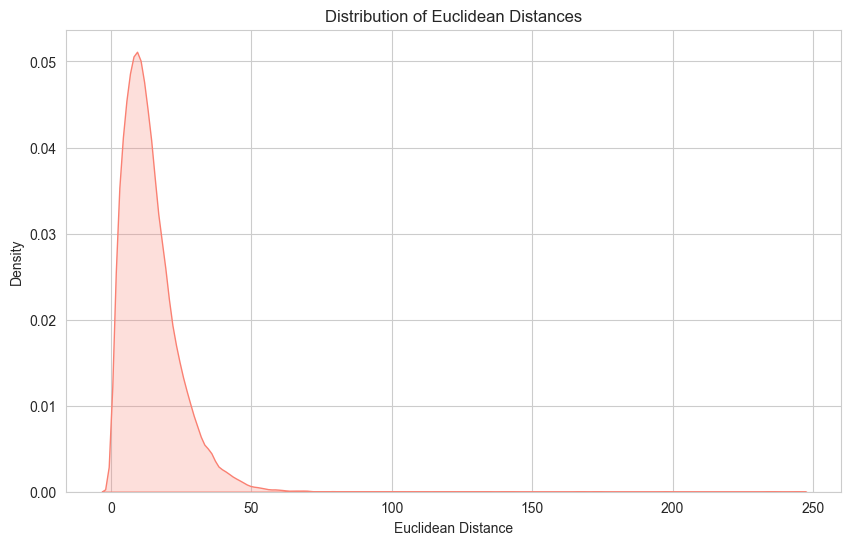

In [309]:
plt.figure(figsize=(10, 6))
sb.kdeplot(gaze_pilot_filtered['distance'], fill=True, color='salmon')
plt.xlabel("Euclidean Distance")
plt.ylabel("Density")
plt.title("Distribution of Euclidean Distances")
plt.show()

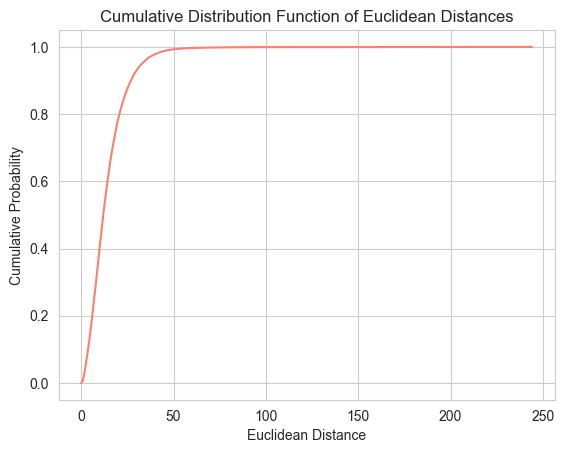

In [310]:
sorted_data = np.sort(gaze_pilot_filtered['distance'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

plt.plot(sorted_data, cdf, color='salmon')
plt.xlabel("Euclidean Distance")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function of Euclidean Distances")
plt.show()

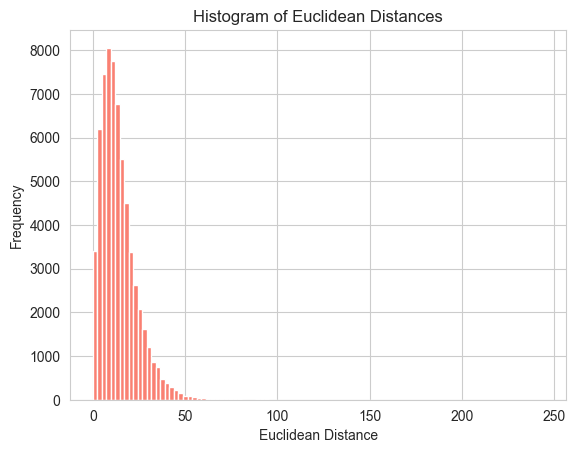

In [311]:
plt.hist(gaze_pilot_filtered['distance'], bins=100, color='salmon')
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Euclidean Distances")
plt.show()

### Fixations

In [379]:
fixations_pilot = pd.read_csv(
    '/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking-hand-movement/data/eye-tracking/narein_piloting/fixations.csv')

In [380]:
fixations_pilot.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation x [px],fixation y [px],azimuth [deg],elevation [deg]
0,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,1,1718830663954517591,1718830664184778591,230,1012.451,673.566,13.366543,-4.057990
1,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,2,1718830664219768591,1718830664299893591,80,1038.473,580.357,15.041816,1.960130
2,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,3,1718830664364909591,1718830664715268591,350,1117.826,560.970,20.197481,3.175001
3,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,4,1718830664770268591,1718830664850393591,80,1104.664,566.271,19.341227,2.842719
4,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,5,1718830664910393591,1718830665440893591,530,1037.711,582.547,14.991610,1.819225


In [381]:
fixations_pilot.shape

(2412, 10)

In [382]:
fixations_pilot.columns

Index(['section id', 'recording id', 'fixation id', 'start timestamp [ns]',
       'end timestamp [ns]', 'duration [ms]', 'fixation x [px]',
       'fixation y [px]', 'azimuth [deg]', 'elevation [deg]'],
      dtype='object')

In [383]:
column_names_fixations = {'section id' : 'section_id',
                          'recording id' : 'recording_id',
                          'fixation id' : 'fixation_id',
                          'start timestamp [ns]' : 'start_timestamp',
                          'end timestamp [ns]' : 'end_timestamp',
                          'duration [ms]' : 'duration',
                          'fixation x [px]' : 'fixation_x',
                          'fixation y [px]' : 'fixation_y',
                          'azimuth [deg]' : 'azimuth',
                          'elevation [deg]': 'elevation'}

fixations_pilot = fixations_pilot.rename(columns=column_names_fixations)

In [384]:
fixations_pilot['start_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_pilot['start_timestamp']]
fixations_pilot['end_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_pilot['end_timestamp']]

In [385]:
fixations_pilot.head()

,section_id,recording_id,fixation_id,start_timestamp,end_timestamp,duration,fixation_x,fixation_y,azimuth,elevation
0,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,1,2024-06-19 16:57:43,2024-06-19 16:57:44,230,1012.451,673.566,13.366543,-4.057990
1,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,2,2024-06-19 16:57:44,2024-06-19 16:57:44,80,1038.473,580.357,15.041816,1.960130
2,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,3,2024-06-19 16:57:44,2024-06-19 16:57:44,350,1117.826,560.970,20.197481,3.175001
3,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,4,2024-06-19 16:57:44,2024-06-19 16:57:44,80,1104.664,566.271,19.341227,2.842719
4,45dedbda-204f-44af-b70b-fe31e6d89a9a,07356784-7b85-467a-9ea1-8b4ab210288e,5,2024-06-19 16:57:44,2024-06-19 16:57:45,530,1037.711,582.547,14.991610,1.819225


In [386]:
fixations_pilot = fixations_pilot[fixations_pilot['end_timestamp'] >= datetime.strptime('2024-06-19 17:00:16', "%Y-%m-%d %H:%M:%S")].reset_index(drop=True)

In [387]:
fixations_pilot = fixations_pilot[500:1272]

In [388]:
to_corr = ['duration', 'fixation_x', 'fixation_y']

In [389]:
fixations_pilot_to_corr = fixations_pilot[to_corr]

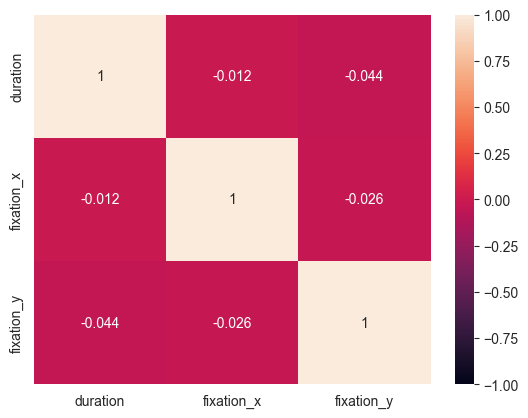

In [390]:
dataplot_fixations = sb.heatmap(fixations_pilot_to_corr.corr(), annot=True, vmin=-1, vmax=1)

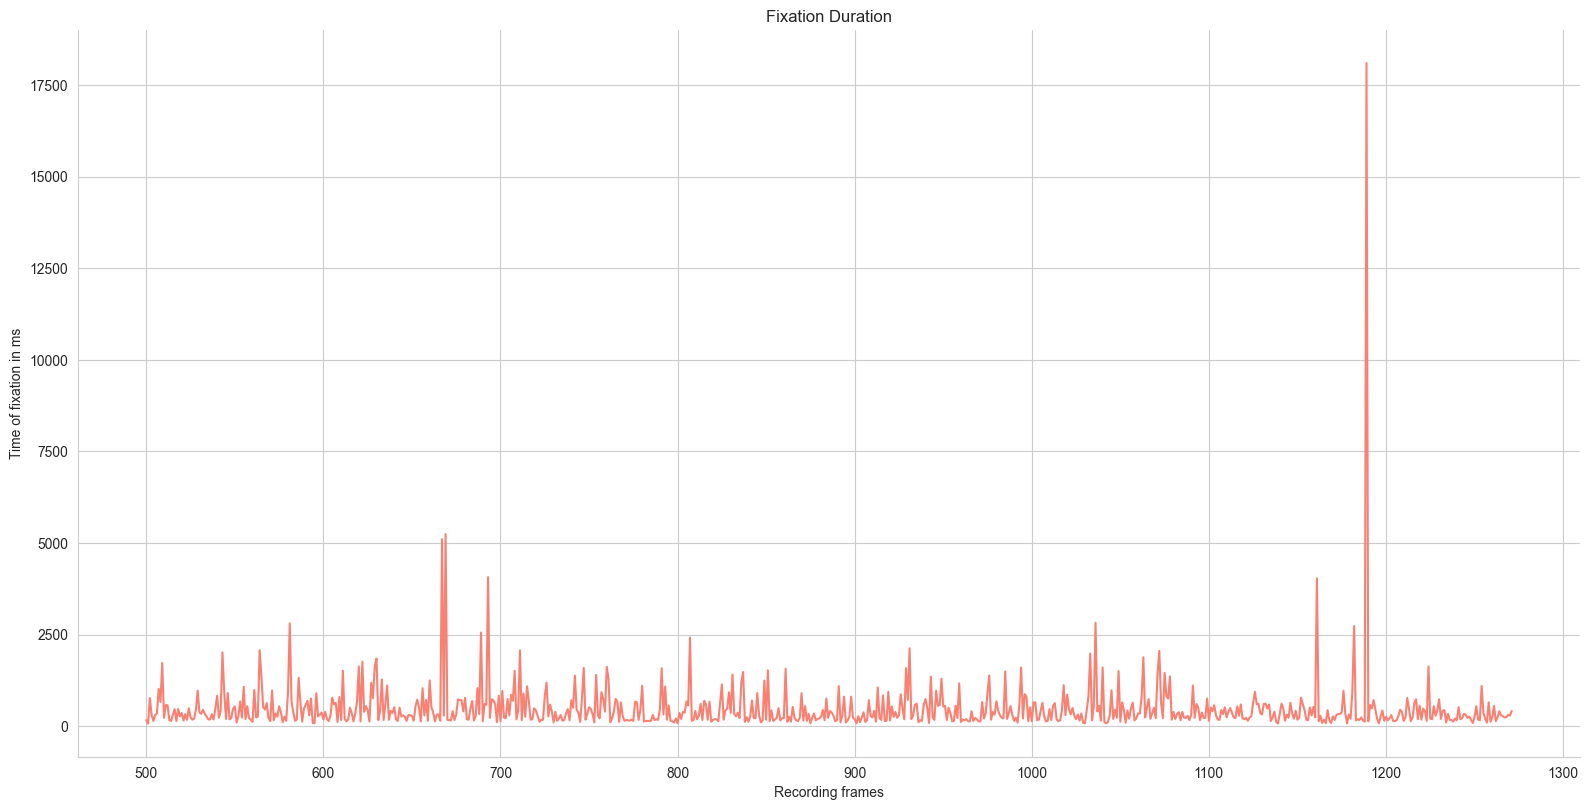

In [391]:
g2 = sb.relplot(data=fixations_pilot, x=fixations_pilot.index, y="duration", kind="line", height=8, aspect=2,
                color='salmon')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Fixation Duration")
plt.show()

In [392]:
window_size = 10  # Adjust window size as needed
fixations_pilot['duration_smoothed'] = fixations_pilot['duration'].rolling(window=window_size).mean()

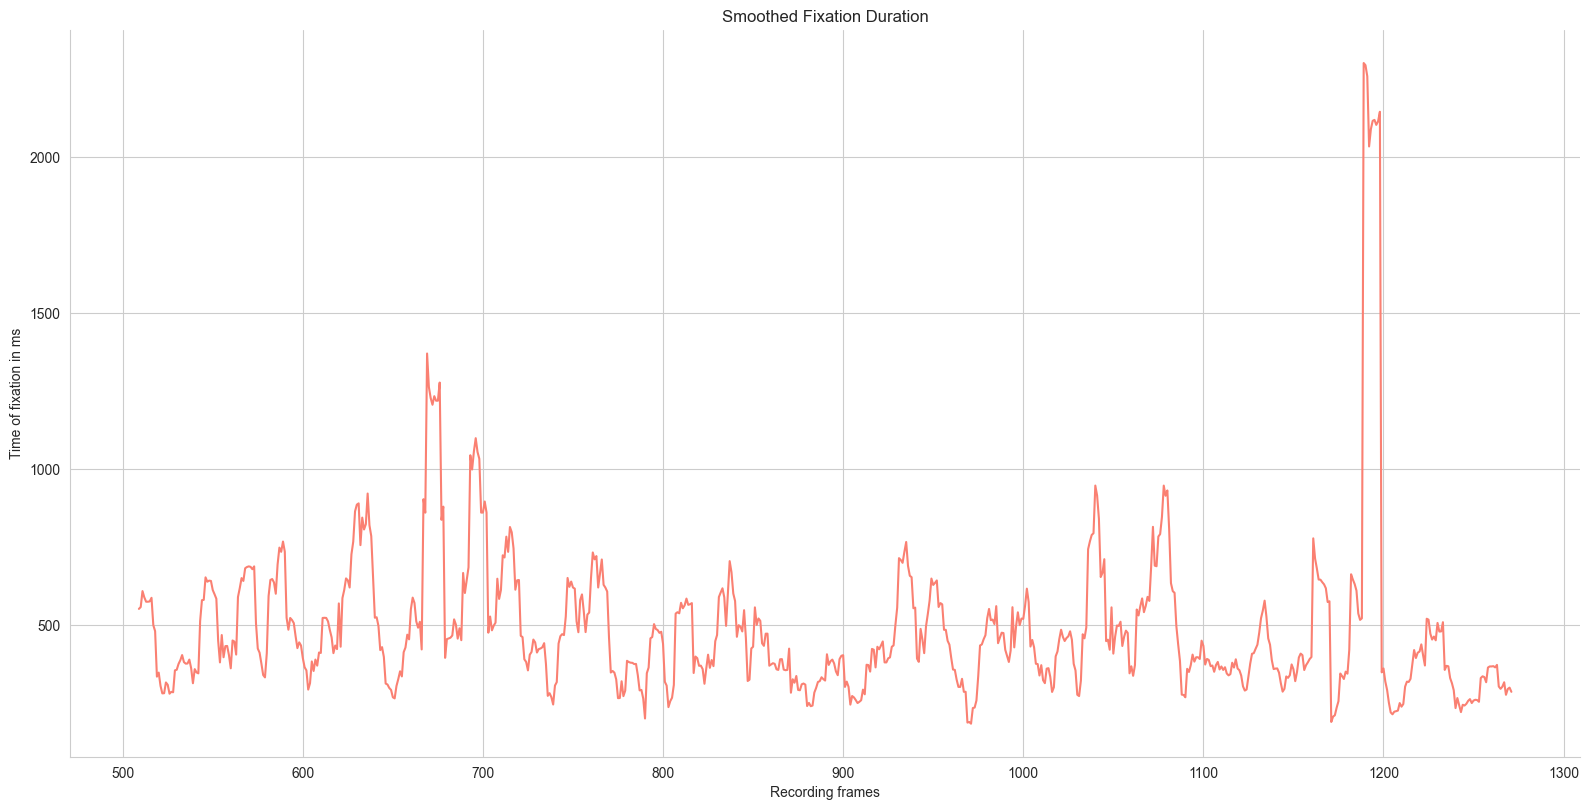

In [393]:
g2 = sb.relplot(data=fixations_pilot, x=fixations_pilot.index, y="duration_smoothed", kind="line", height=8,
                aspect=2, color='salmon')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Smoothed Fixation Duration")
plt.show()

### Saccades (not available)

## Hand movement

# Compare plots

# Classification